In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
def calculate_wape(actual_values, forecast_values):

    
    residuals = actual_values - forecast_values

    normalized_residuals = residuals / np.max(np.abs(residuals))
    weights = np.abs(normalized_residuals)


    absolute_percentage_errors = np.abs((actual_values - forecast_values) / actual_values) * 100

    wape = np.average(absolute_percentage_errors, weights=weights)
    return wape

# Switch the dataset by converting from markdown to code

#ORIGINAL DATASET

mytrainingdata = pd.read_csv('train_data.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data.csv',index_col=0) #added index

In [ ]:
#AUGMENTED DATASET

mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #added index

# Understanding and preparation of the data

In general, you don't need to normalize the features in a Random Forest. Random Forests are ensemble models composed of decision trees, and they are not sensitive to the scale of input features. Decision trees split nodes based on feature values and do not rely on the magnitude of the features.

Normalization (or feature scaling) is more critical for models that use distance-based metrics, such as Support Vector Machines, k-Nearest Neighbors, or neural networks, where the scale of features can impact the model's performance.

In [4]:
mytrainingdata.describe()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_mln,Population_k,tmin,tavg,tmax
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.353229,93.865469,10.700651,0.518203,41.789219,317.129792,427.737731,16.186589,19.380729,23.268750
std,0.040050,12.468773,21.464982,2.084666,35.178540,111.538066,27.144606,4.349929,5.207636,5.685618
min,0.270000,76.440000,0.000000,0.000000,0.000000,168.870000,398.580000,7.500000,10.200000,13.000000
25%,0.320000,84.203750,0.000000,0.000000,0.000000,229.780000,406.587813,12.400000,14.387500,18.125000
50%,0.350000,90.402500,0.000000,0.000000,34.315000,283.165000,416.086667,16.100000,18.775000,22.850000
75%,0.380000,100.223750,0.000000,0.000000,74.275000,387.757500,443.848021,19.928125,24.300000,28.500000
max,0.490000,133.010000,72.785000,11.120000,111.070000,680.220000,501.631250,24.000000,28.800000,33.600000


In [5]:
print(mytrainingdata.dtypes)

Max_Demand_GW                float64
Plant_Production_GWh         float64
Imports_GWh                  float64
Renewables_Production_GWh    float64
powerplants_c02_kt           float64
GDP_mln                      float64
Population_k                 float64
tmin                         float64
tavg                         float64
tmax                         float64
dtype: object


In [6]:
#The input and output features preparation

In [7]:
#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)  #Plant_Production_GWh'
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)  #Plant_Production_GWh'

#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW'],axis = 1)

In [8]:
X_train.shape

(384, 8)

In [9]:
print(X_train[:10])

                     Imports_GWh  Renewables_Production_GWh  \
Date                                                          
2003-01-01 00:00:00          0.0                        0.0   
2003-01-16 12:00:00          0.0                        0.0   
2003-02-01 00:00:00          0.0                        0.0   
2003-02-15 00:00:00          0.0                        0.0   
2003-03-01 00:00:00          0.0                        0.0   
2003-03-16 12:00:00          0.0                        0.0   
2003-04-01 00:00:00          0.0                        0.0   
2003-04-16 00:00:00          0.0                        0.0   
2003-05-01 00:00:00          0.0                        0.0   
2003-05-16 12:00:00          0.0                        0.0   

                     powerplants_c02_kt  GDP_mln  Population_k   tmin   tavg  \
Date                                                                           
2003-01-01 00:00:00                 0.0   196.43    398.580000  10.90  13.20   
200

# Initial Model

In [10]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

#Instantiate the model
model = RandomForestRegressor(n_estimators = 30,random_state = 30)

#n_estimators = number of trees
#random_state = random seed for reproducibility

#Fitting the rf model to the training data
fitted_rf = model.fit(X_train, y_train)

In [11]:
#Evaluation on train

# The training r_Sq (coef of determination)
print('The training r_sq is: %.2f'% fitted_rf.score(X_train,y_train))

#Prediction on the training dataset
ytrain_pred = fitted_rf.predict(X_train)

print('The MAE is: %.4f'% mean_absolute_error(y_train,ytrain_pred))
print('The MSE is: %.4f'% mean_squared_error(y_train,ytrain_pred))
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print('The EVS is: %.4f'% explained_variance_score(y_train,ytrain_pred))

The training r_sq is: 0.98
The MAE is: 0.0040
The MSE is: 0.0000
The RMSE is: 0.0052
The EVS is: 0.9829


In [12]:
#Evaluation on test

#Prediction on the testing data
ytest_pred = fitted_rf.predict(X_test)
#take input X_test and store predictions in ytest_pred

#print(ytest_pred[:10])

#The testing r_sq (coef of determination)
#print('The testing r_sq is: %.2f'% r2_score(y_test,ytest_pred))
#Or this gives same result
#print('The testing r_sq is: %.2f'% fitted_rf.score(X_test,y_test))

# Calculate R-squared
r2 = r2_score(y_test, ytest_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, ytest_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, ytest_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

wape = calculate_wape(y_test,ytest_pred)

# Calculate the absolute percentage error for each prediction
absolute_percentage_errors = np.abs((y_test - ytest_pred) / y_test) * 100

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(absolute_percentage_errors)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, ytest_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'WAPE: {wape:.2f}')
print(f'MAPE: {mape:.2f}%')

R-squared: 0.3667 (Ideal: 1)
Mean Absolute Error: 0.0401 (Ideal: 0)
Mean Squared Error: 0.0024 (Ideal: 0)
Root Mean Squared Error: 0.0494 (Ideal: 0)
Explained Variance Score: 0.7136 (Ideal: 1)
WAPE: 12.73
MAPE: 8.83%


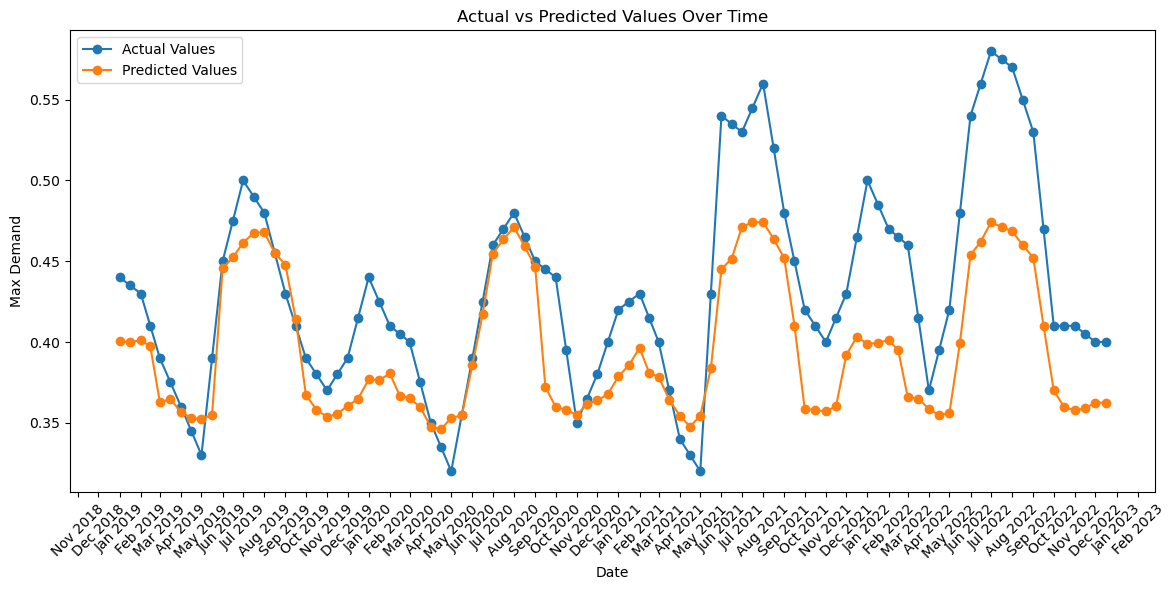

In [13]:
#Convert index to datetime
y_test.index = pd.to_datetime(y_test.index)

# Assuming X_test has a datetime index
plt.rcParams['figure.figsize'] = (14, 6)

# Plotting the observed and predicted data against date
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')
plt.plot(y_test.index, ytest_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

# Display the plot
plt.show()

# K-Fold Cross Validation

In [14]:
from numpy import absolute

#The k-fold CV
from sklearn.model_selection import cross_val_score

seed = 7

#Training model CV
score_train = cross_val_score(fitted_rf,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)

print("Train Scores", score_train)

#The absolute mean score
print("Absolute Mean Train Score", absolute(np.mean(score_train)))

#The testing model CV
score_test = cross_val_score(fitted_rf,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

print("Test Scores", -score_test)
print("Absolute Mean Test Score", absolute(np.mean(score_test)))

Train Scores [-0.00030328 -0.0002275  -0.00034277 -0.00044736 -0.00015397 -0.00022647
 -0.00017542 -0.00040305 -0.00045851 -0.00259504]
Absolute Mean Train Score 0.0005333382366171839
Test Scores [0.00036341 0.00061788 0.00016302 0.00164789 0.0002794  0.00247491
 0.00042258 0.00164491 0.00113101 0.00117537]
Absolute Mean Test Score 0.0009920378086419736


Plotting the prediction errors and residuals
Installed Yellowbrick

In [ ]:
#Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(fitted_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

# Set the axes titles
#visualizer.ax.set_xlabel('Actual Values ($y$)')
#visualizer.ax.set_ylabel('Predicted Values ($\\hat{y}$)')

# Set the title
#visualizer.set_title('Prediction Error Analysis for RandomForestRegressor')

visualizer.poof()

# This visualizer is specifically designed for regression problems and helps in visualizing the difference between the true target values (y_test) and the predicted values.


# Set the axes labels using Matplotlib after poof
#plt.gca().set_xlabel('Actual Values ($y$)')
#plt.gca().set_ylabel('Predicted Values ($\\hat{y}$)')

# Display the modified plot
#plt.show()


#THIS GIVES THE SAME THING

# Visualize the overall prediction on test data
#plt.scatter(y_test, y_pred, color='blue')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
#plt.xlabel('Actual Values (Test)')
#plt.ylabel('Predicted Values (Test)')
#plt.title('Actual vs. Predicted Values for Random Forest Regression on Test Data')
#plt.legend()
#plt.show()


#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(fitted_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

#The ResidualsPlot visualizer is used to visualize the residuals (the differences between the actual and predicted values) of a regression model.

# Visualize Trees

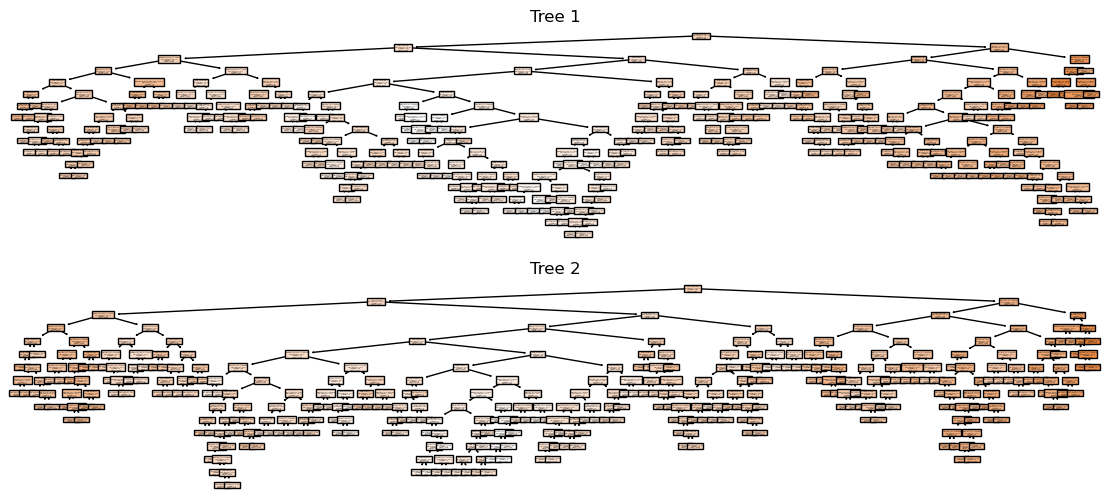

In [15]:
#VISUALIZE THE TREES IN THE RANDOM FOREST

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Predict on test data
y_pred = fitted_rf.predict(X_test)
# Visualize individual decision trees
fig, axes = plt.subplots(nrows=2, ncols=1)#figsize=(20, 4), dpi=80
for i in range(2): #HAVE TO CHANGE THE NUMBER OF ESTIMATORS
    plot_tree(fitted_rf.estimators_[i], feature_names=X_train.columns.tolist(), filled=True, ax=axes[i])
    axes[i].set_title(f'Tree {i + 1}')

plt.show()

# Code to export images of the trees in the random forest

#EXPORT THE TREES IN THE RF

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os


# Create a directory to save the images
output_dir = 'tree_plots'
os.makedirs(output_dir, exist_ok=True)

# Predict on test data
y_pred = fitted_rf.predict(X_test)

# Visualize individual decision trees and save them as PNG images
for i, tree in enumerate(fitted_rf.estimators_[:10]):
    fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
    plot_tree(tree, feature_names=X_train.columns.tolist(), filled=True, ax=ax)
    ax.set_title(f'Tree {i + 1}')
    
    # Save the figure as PNG
    output_path = os.path.join(output_dir, f'tree_{i + 1}.png')
    plt.savefig(output_path)
    plt.close()  # Close the figure to free up resources

# Optional: Display a message indicating that the images are saved
print(f"Tree plots saved in {output_dir}")


# Feature Importance

In [17]:
# Random Forest Feature Ranking
#import pandas as pd

from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(fitted_rf.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)


tavg                         0.677092
GDP_mln                      0.095826
Population_k                 0.069027
tmin                         0.068239
powerplants_c02_kt           0.051596
tmax                         0.032753
Imports_GWh                  0.004794
Renewables_Production_GWh    0.000673
dtype: float64


# GridSearchCV - convert appropriate parameter grid from markdown to code

# Parameter Grid for Original Dataset

# Define the parameter grid
param_grid = {
    #'n_estimators': [5, 10, 30, 50, 100], #,150, 200,300,400],
    'n_estimators': [32],#[70],#[5,10,20,30,40,50,60,70,80,90],#100,150,200],#[70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#, #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [11],#[10],#[5,6,7,8,9,10,11,12,13,14],#[10],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    #'max_depth': [11],
    
    'min_samples_split': [2],#[2,3,4],#,5,6,7,8,9,10], #[2]
    'min_samples_leaf': [1],#[1,2,3],#,4,5,6,7,8,9],#[1]
    'max_features': ['log2'],#['sqrt', 'log2', None, 0.5, 0.7],#['log2'],#
    'bootstrap': [False], 
    #'oob_score': [True,False],
    #'warm_start': [False],
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error']#['squared_error', 'absolute_error', 'poisson', 'friedman_mse']

    
    
    #TRY OUT COMMENTED ONES
    # write what each of these parameters does
    
}

# Parameter Grid for Augmented Dataset

In [18]:
# Define the parameter grid
param_grid = {
    'n_estimators': [70],#[70],#[5,10,20,30,40,50,60,70,80,90],#100,150,200],#[70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#, #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [10],#[10],#[5,6,7,8,9,10,11,12,13,14],#[10],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    #'max_depth': [11],
    
    'min_samples_split': [7],#[2,3,4],#,5,6,7,8,9,10], #[2]
    'min_samples_leaf': [4],#[1,2,3],#,4,5,6,7,8,9],#[1]
    'max_features': ['log2'],#['sqrt', 'log2', None, 0.5, 0.7],#['log2'],#
    'bootstrap': [False], 
    #'oob_score': [True,False],
    #'warm_start': [False],
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error']#['squared_error', 'absolute_error', 'poisson', 'friedman_mse']

    
    
    #TRY OUT COMMENTED ONES
    # write what each of these parameters does
    
}

Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 70}


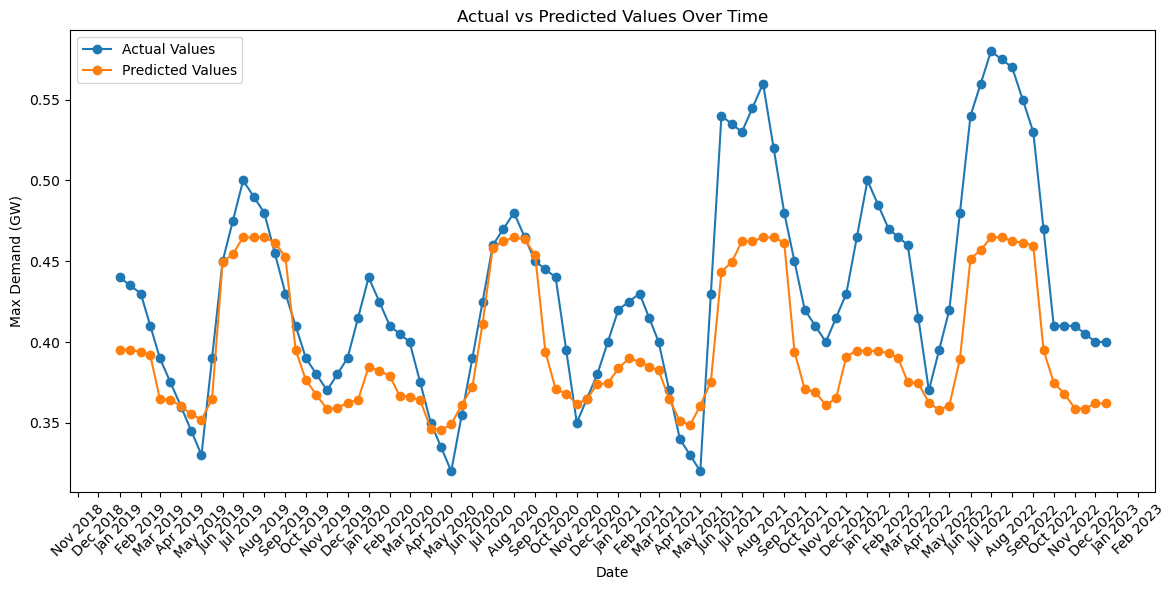

R-squared: 0.3667 (Ideal: 1)
2nd CV R-squared: 0.3505 (Ideal: 1) 

Mean Absolute Error: 0.0401 (Ideal: 0)
2nd CV Mean Absolute Error: 0.0400 (Ideal: 0) 

Mean Squared Error: 0.0024 (Ideal: 0)
2nd CV Mean Squared Error: 0.0025 (Ideal: 0) 

Root Mean Squared Error: 0.0494 (Ideal: 0)
2nd CV Root Mean Squared Error: 0.0500 (Ideal: 0) 

Explained Variance Score: 0.7136 (Ideal: 1)
2nd CV Explained Variance Score: 0.6861 (Ideal: 1)
WAPE: 12.91
MAPE: 8.75%


In [19]:
# Code for GridSearch CV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV




# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

#cv was 10 before


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)



# Plotting y_test and y_pred against date
plt.figure(figsize=(14, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

# Display the plot
plt.show()

# Calculate R-squared
r2c = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maec = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
msec = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmsec = np.sqrt(msec)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variancec = explained_variance_score(y_test, y_pred_best)



wapec = calculate_wape(y_test,y_pred_best)

# Calculate the absolute percentage error for each prediction
absolute_percentage_errors_new = np.abs((y_test - y_pred_best) / y_test) * 100

# Calculate the Mean Absolute Percentage Error (MAPE)
mapec = np.mean(absolute_percentage_errors_new)


# Display the results
#print(f'R-squared: {r2:.4f} (Ideal: 1)')
#print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2c:.4f} (Ideal: 1) \n')
#print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
#print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
#print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
#print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
#print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
#print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
#print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
#print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')
print(f'WAPE: {wapec:.2f}')
print(f'MAPE: {mapec:.2f}%')

# Feature Importance

In [20]:

from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(best_model.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)


tavg                         0.346561
tmax                         0.220537
tmin                         0.163583
GDP_mln                      0.123926
Population_k                 0.075840
powerplants_c02_kt           0.050530
Imports_GWh                  0.014358
Renewables_Production_GWh    0.004664
dtype: float64


# K-Fold Cross Validation

In [21]:
from numpy import absolute

#The k-fold CV
from sklearn.model_selection import cross_val_score

seed = 7

#Training model CV
score_train = cross_val_score(best_model,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)

print("Train Scores", score_train)

#The absolute mean score
print("Absolute Mean Train Score", absolute(np.mean(score_train)))


#The testing model CV
score_test = cross_val_score(best_model,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

print("Test Scores", -score_test)
print("Absolute Mean Test Score", absolute(np.mean(score_test)))

Train Scores [-0.00032951 -0.00023641 -0.00030823 -0.00035866 -0.00019815 -0.00020647
 -0.00015873 -0.00057149 -0.00047175 -0.00246791]
Absolute Mean Train Score 0.0005307318655617713
Test Scores [0.00030269 0.00061196 0.00027371 0.00211987 0.0004537  0.00170545
 0.00037273 0.00198289 0.00134248 0.00082812]
Absolute Mean Test Score 0.0009993603187279229


# Find average depth of the trees

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(random_state=30,n_estimators=70,max_depth=8,min_samples_split=2,min_samples_leaf=1,max_features='log2')
#tree.plot_tree(regressor.estimators_[0],feature_names=X_train.columns, filled=True)


#y_pred = rf.predict(X_test)

max_depth = list()
for tree in rf.estimators_:
    max_depth.append(tree.tree_.max_depth)

print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

# Notes on the hyperparameters

The `max_features` parameter in the context of random forests is a hyperparameter that determines the maximum number of features each tree in the forest is allowed to use when splitting a node. It plays a crucial role in controlling the diversity of individual trees in the ensemble.

Here are the possible values for `max_features`:

1. **`None` or `auto`**: The algorithm considers using all features for the split at each node. This can lead to more diverse trees, but it might also make the trees more correlated.

2. **`sqrt`**: It uses the square root of the total number of features. For example, if there are 16 features, `sqrt(16)` equals 4, so each split will consider 4 randomly chosen features.

3. **`log2`**: It uses the base-2 logarithm of the total number of features. Similar to `sqrt`, this restricts the number of features considered for each split.

4. **Float between 0.0 and 1.0**: It represents the fraction of features to consider for each split. For example, if `max_features` is set to 0.5, then half of the features will be considered for each split.

5. **Integer**: It represents the exact number of features to consider for each split. For instance, if `max_features` is set to 3, then only 3 randomly chosen features will be considered for each split.

Choosing an appropriate value for `max_features` involves a trade-off. Using fewer features can lead to more diverse trees, reducing the risk of overfitting, but it might also result in less accurate models. On the other hand, using more features can make the trees more accurate, but it might increase the risk of overfitting and make the trees more correlated. The optimal value often depends on the specific dataset and problem. Cross-validation or grid search can be used to find a good value for `max_features`.

When the max_depth parameter is set to None in scikit-learn's RandomForestRegressor, it means that the trees in the random forest will grow until they contain min_samples_split samples or fewer in each leaf node. It doesn't restrict the depth of the trees, allowing them to grow until a certain number of samples are reached in the leaf nodes.

In your case, during the grid search, the algorithm found that the combination of hyperparameters that resulted in the best performance on the cross-validated negative mean absolute error included max_depth=None. This suggests that, for your specific dataset and problem, deeper trees without a maximum depth constraint lead to better model performance.

It's worth noting that the optimal hyperparameter values, including max_depth, can vary across different datasets and problems. The best choice for max_depth depends on the complexity of the underlying patterns in the data. For some datasets, deeper trees might capture more intricate patterns, while for others, it could lead to overfitting.

R^2 assesses the goodness of fit of a regression model on unseen or test data. 

0 indicates that the model does not explain any of the variability in the target variable.
1 indicates that the model explains all of the variability in the target variable.

# Nested CV with GridSearch

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Create the Random Forest regressor
regressor = RandomForestRegressor(random_state=30)

# Specify the hyperparameter grid
param_dist = {
    'n_estimators': [5,10,20,30,40,50,60,70,80,90],#100,150,200],#[70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#, #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [5,6,7,8,9,10,11,12,13,14,15],#[10],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],#['log2'],#
    'bootstrap': [False], 
    # ADDED MORE HYPERPARAMETERS NEXT
}

# Create the outer cross-validation splits
outer_cv = KFold(n_splits=15, shuffle=True, random_state=30)

# Perform nested cross-validation with GridSearchCV
grid_search = GridSearchCV(regressor, param_grid=param_dist, cv=10, scoring='neg_mean_squared_error')
nested_scores = cross_val_score(grid_search, X=X_train, y=y_train, cv=outer_cv)

# Get the mean performance across outer folds
mean_nested_score = nested_scores.mean()

# Fit the model with the best hyperparameters on the entire training set
grid_search.fit(X_train, y_train)
new_best_params = grid_search.best_params_
best_reg = RandomForestRegressor(random_state=30, **new_best_params)
best_reg.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", new_best_params)

# Print the mean nested cross-validation score
print("Mean Nested Cross-Validation Score: {:.2f}".format(mean_nested_score))


# Train a new model with the best hyperparameters
best_reg = RandomForestRegressor(random_state=30, **new_best_params)
best_reg.fit(X_train, y_train)

y_pred = best_reg.predict(X_test)


# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate R-squared
r2b = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mseb)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'1st CV R-squared: {r2c:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'1st CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'1st CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'1st CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'1st CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')


# Nested CV with RandomizedSearch


from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint


# Create the Random Forest regressor
regressor = RandomForestRegressor(random_state=30)

 

param_dist = {
    'max_depth': randint(1, 20),  
    'min_samples_split': randint(2, 11), 
    # ADDED MORE HYPERPARAMETERS NEXT
}


# Create the outer cross-validation splits
outer_cv = KFold(n_splits=15, shuffle=True, random_state=42)

# Perform nested cross-validation with RandomizedSearchCV
random_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=100, cv=15, scoring='neg_mean_squared_error', random_state=42)
nested_scores = cross_val_score(random_search, X=X_train, y=y_train, cv=outer_cv)

# Get the mean performance across outer folds
mean_nested_score = nested_scores.mean()

# Fit the model with the best hyperparameters on the entire training set
random_search.fit(X_train, y_train)
new_best_params = random_search.best_params_
best_reg = RandomForestRegressor(random_state=30, **new_best_params)
best_reg.fit(X_train, y_train)




# Print the best hyperparameters
print("Best Hyperparameters:", new_best_params)

# Print the mean nested cross-validation score
print("Mean Nested Cross-Validation Score: {:.2f}".format(mean_nested_score))



# Train a new model with the best hyperparameters
best_reg = RandomForestRegressor(random_state=30, **new_best_params)
best_reg.fit(X_train, y_train)

y_pred = best_reg.predict(X_test)


# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate R-squared
r2b = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mseb)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'1st CV R-squared: {r2c:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'1st CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'1st CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'1st CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'1st CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')

# Feature Engineering - Ratio Features

Feature engineering involves manipulating or creating new features from existing ones to improve the performance of a machine learning model. I initially dropped the generation feature due to high correlation with demand. Now, considering using the predicted demand as a feature to predict generation.

In [23]:
mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #added index

additional_features_training = pd.DataFrame({
    'GDP_Per_Capita':  mytrainingdata['GDP_mln'] / mytrainingdata['Population_k'],
    'Temperature_Range': mytrainingdata['tmax'] - mytrainingdata['tmin']
}, index=mytrainingdata.index)

additional_features_test = pd.DataFrame({
    'GDP_Per_Capita':  mytestdata['GDP_mln'] / mytestdata['Population_k'],
    'Temperature_Range': mytestdata['tmax'] - mytestdata['tmin']
}, index=mytestdata.index)


# Add the additional features to the training dataset
mytrainingdata = pd.concat([mytrainingdata, additional_features_training], axis=1)
mytestdata = pd.concat([mytestdata, additional_features_test], axis=1)

#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh','tmax','tmin'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh','tmax','tmin'],axis = 1)

In [24]:
mytrainingdata.head()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_mln,Population_k,tmin,tavg,tmax,GDP_Per_Capita,Temperature_Range
Date,,,,,,,,,,,,
2003-01-01 00:00:00,0.36,91.040,0.0,0.0,0.0,196.43,398.580000,10.90,13.20,15.60,0.492825,4.7
2003-01-16 12:00:00,0.38,91.040,0.0,0.0,0.0,196.43,398.580000,9.40,11.80,14.30,0.492825,4.9
2003-02-01 00:00:00,0.40,93.550,0.0,0.0,0.0,201.85,398.580000,7.90,10.40,13.00,0.506423,5.1
2003-02-15 00:00:00,0.37,93.550,0.0,0.0,0.0,201.85,398.692083,8.85,11.55,14.35,0.506280,5.5
2003-03-01 00:00:00,0.34,88.185,0.0,0.0,0.0,190.27,398.804167,9.80,12.70,15.70,0.477101,5.9


In [25]:
mytestdata.head()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_mln,Population_k,tmin,tavg,tmax,GDP_Per_Capita,Temperature_Range
Date,,,,,,,,,,,,
2019-01-01 00:00:00,0.440,112.38,23.480,5.225,31.53,604.45,502.440833,8.80,11.60,14.40,1.203027,5.60
2019-01-16 12:00:00,0.435,112.38,23.480,5.225,31.53,604.45,503.250417,8.75,11.80,14.85,1.201092,6.10
2019-02-01 00:00:00,0.430,99.77,30.295,5.965,27.99,536.63,504.060000,8.70,12.00,15.30,1.064615,6.60
2019-02-15 00:00:00,0.410,99.77,30.295,5.965,27.99,536.63,504.529583,9.95,13.25,16.50,1.063624,6.55
2019-03-01 00:00:00,0.390,99.64,29.430,8.415,27.96,535.93,504.999167,11.20,14.50,17.70,1.061249,6.50


In [26]:
#Get New Random Forest Scores 

Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70}


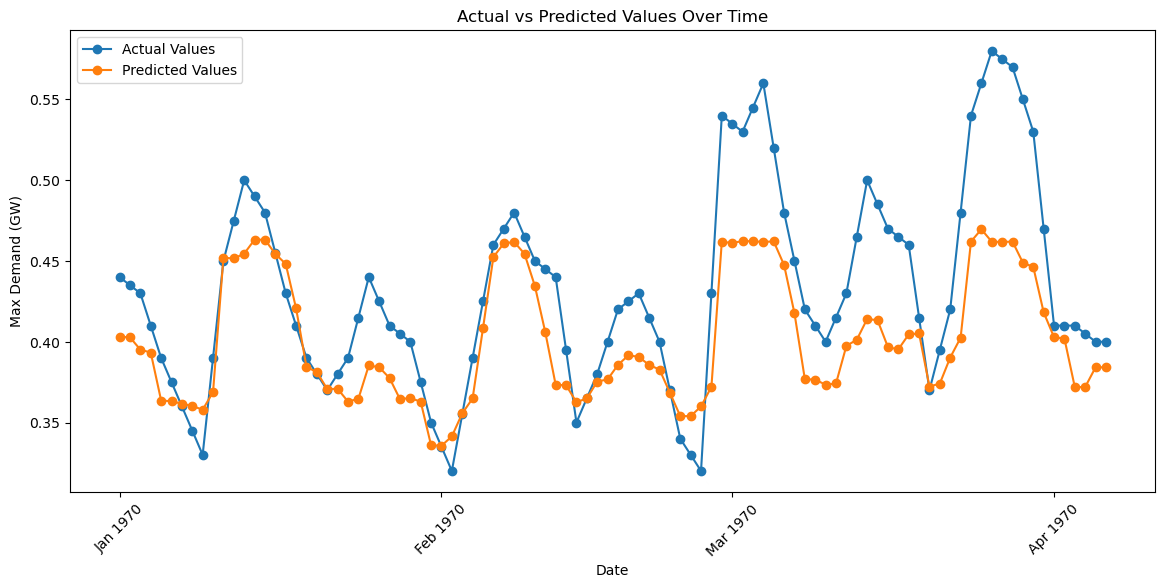

2nd CV R-squared: 0.4590 (Ideal: 1) 

2nd CV Mean Absolute Error: 0.0354 (Ideal: 0) 

2nd CV Mean Squared Error: 0.0021 (Ideal: 0) 

2nd CV Root Mean Squared Error: 0.0457 (Ideal: 0) 

2nd CV Explained Variance Score: 0.7146 (Ideal: 1)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

# Define the parameter grid
param_grid = {
    #'n_estimators': [5, 10, 30, 50, 100], #,150, 200,300,400],
    'n_estimators': [70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#[20,30,40,50,60,70], #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [10],#[5,6,7,8,9,10,11,12,13,14,15],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    #'max_depth': [11],
    
    'min_samples_split': [3],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'bootstrap': [True,False], 
    #'oob_score': [True, False],
    #'warm_start': [False],
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error']#['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
    
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=15, n_jobs=-1)

#cv was 10 before


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)



# Plotting y_test and y_pred against date
plt.figure(figsize=(14, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

# Display the plot
plt.show()

# Calculate R-squared
r2c = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maec = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
msec = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmsec = np.sqrt(msec)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variancec = explained_variance_score(y_test, y_pred_best)

# Display the results
#print(f'R-squared: {r2:.4f} (Ideal: 1)')
#print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2c:.4f} (Ideal: 1) \n')
#print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
#print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
#print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
#print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
#print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
#print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
#print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
#print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')

In [28]:
#Feature Importances

from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(best_model.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)


tavg                         0.496905
GDP_Per_Capita               0.153796
GDP_mln                      0.103715
powerplants_c02_kt           0.086761
Population_k                 0.085036
Temperature_Range            0.062517
Imports_GWh                  0.008363
Renewables_Production_GWh    0.002906
dtype: float64


# Feature Engineering - Interaction Terms

In [29]:
mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #added index


# Create interaction terms between temperature features and renewables production
mytrainingdata['tmin_renewable_interaction'] = mytrainingdata['tmin'] * mytrainingdata['Renewables_Production_GWh']
mytrainingdata['tavg_renewable_interaction'] = mytrainingdata['tavg'] * mytrainingdata['Renewables_Production_GWh']
mytrainingdata['tmax_renewable_interaction'] = mytrainingdata['tmax'] * mytrainingdata['Renewables_Production_GWh']

# Repeat the same for mytestdata if needed
mytestdata['tmin_renewable_interaction'] = mytestdata['tmin'] * mytestdata['Renewables_Production_GWh']
mytestdata['tavg_renewable_interaction'] = mytestdata['tavg'] * mytestdata['Renewables_Production_GWh']
mytestdata['tmax_renewable_interaction'] = mytestdata['tmax'] * mytestdata['Renewables_Production_GWh']


#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}


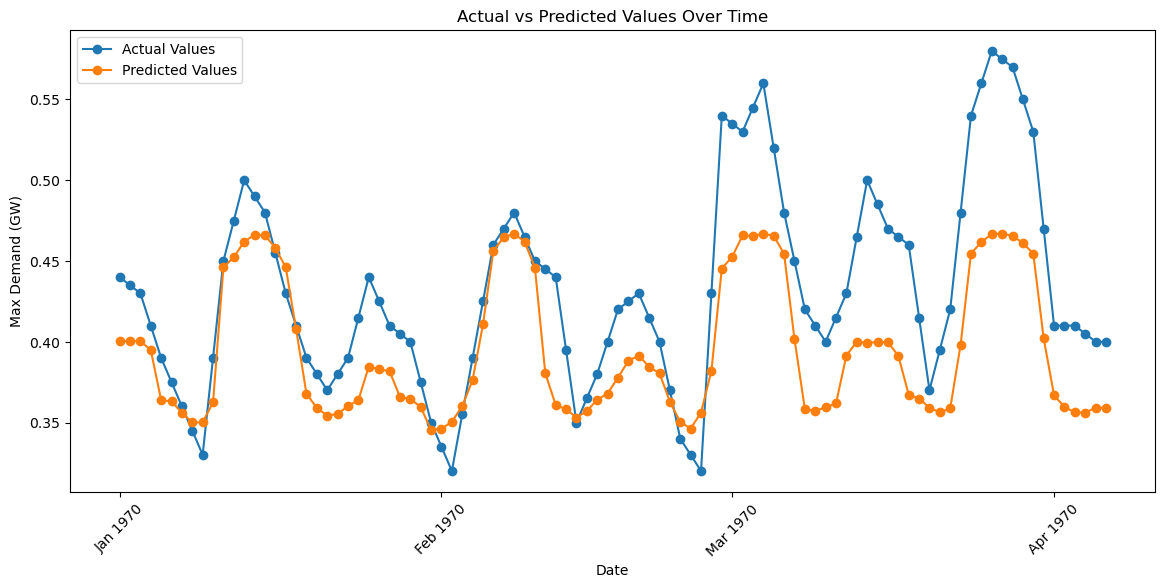

2nd CV R-squared: 0.3520 (Ideal: 1) 

2nd CV Mean Absolute Error: 0.0405 (Ideal: 0) 

2nd CV Mean Squared Error: 0.0025 (Ideal: 0) 

2nd CV Root Mean Squared Error: 0.0500 (Ideal: 0) 

2nd CV Explained Variance Score: 0.7120 (Ideal: 1)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

# Define the parameter grid
param_grid = {
    #'n_estimators': [5, 10, 30, 50, 100], #,150, 200,300,400],
    'n_estimators': [70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#[20,30,40,50,60,70], #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [10],#[5,6,7,8,9,10,11,12,13,14,15],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    #'max_depth': [11],
    
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True,False], 
    
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=15, n_jobs=-1)

#cv was 10 before


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)



# Plotting y_test and y_pred against date
plt.figure(figsize=(14, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)


# Display the plot
plt.show()

# Calculate R-squared
r2c = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maec = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
msec = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmsec = np.sqrt(msec)

# Calculate Explained Variance Score
explained_variancec = explained_variance_score(y_test, y_pred_best)

# Display the results
#print(f'R-squared: {r2:.4f} (Ideal: 1)')
#print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2c:.4f} (Ideal: 1) \n')
#print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
#print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
#print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
#print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
#print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
#print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
#print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
#print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')

In [31]:
from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(best_model.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)

tavg                          0.536693
tmax                          0.140563
GDP_mln                       0.097763
tmin                          0.090019
Population_k                  0.082776
powerplants_c02_kt            0.040370
Imports_GWh                   0.009050
tmin_renewable_interaction    0.000971
tmax_renewable_interaction    0.000726
tavg_renewable_interaction    0.000617
Renewables_Production_GWh     0.000451
dtype: float64


In [32]:
mytrainingdata.head()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_mln,Population_k,tmin,tavg,tmax,tmin_renewable_interaction,tavg_renewable_interaction,tmax_renewable_interaction
Date,,,,,,,,,,,,,
2003-01-01 00:00:00,0.36,91.040,0.0,0.0,0.0,196.43,398.580000,10.90,13.20,15.60,0.0,0.0,0.0
2003-01-16 12:00:00,0.38,91.040,0.0,0.0,0.0,196.43,398.580000,9.40,11.80,14.30,0.0,0.0,0.0
2003-02-01 00:00:00,0.40,93.550,0.0,0.0,0.0,201.85,398.580000,7.90,10.40,13.00,0.0,0.0,0.0
2003-02-15 00:00:00,0.37,93.550,0.0,0.0,0.0,201.85,398.692083,8.85,11.55,14.35,0.0,0.0,0.0
2003-03-01 00:00:00,0.34,88.185,0.0,0.0,0.0,190.27,398.804167,9.80,12.70,15.70,0.0,0.0,0.0


# Feature Engineering - Rolling Average

In [33]:
mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #added index


In [34]:
import pandas as pd

# Assuming your dataframe is named mytrainingdata
# Define the window size for the rolling average
window_size = 5  # You can adjust this based on your preference


#CONSIDER LARGER WINDOW

# Specify the columns for which you want to compute rolling averages
columns_to_roll = ['GDP_mln', 'Population_k','tavg']

# Compute rolling averages
for column in columns_to_roll:
    mytrainingdata[f'{column}_rolling_avg'] = mytrainingdata[column].rolling(window=window_size).mean()

# Repeat the same for mytestdata if needed
for column in columns_to_roll:
    mytestdata[f'{column}_rolling_avg'] = mytestdata[column].rolling(window=window_size).mean()


In [35]:
#Cater for the first NaNs because they have nothing to average

import pandas as pd

# Assuming your dataframe is named mytrainingdata
# Define the window size for the rolling average
window_size = 3  # You can adjust this based on your preference

# Specify the columns for which you want to compute rolling averages
columns_to_roll = ['GDP_mln', 'Population_k','tavg']

# Compute rolling averages with condition
for column in columns_to_roll:
    rolling_avg_col = f'{column}_rolling_avg'
    mytrainingdata[rolling_avg_col] = mytrainingdata[column].rolling(window=window_size).mean()
    # Fill NaN values with the original column value
    mytrainingdata[rolling_avg_col].fillna(mytrainingdata[column], inplace=True)

# Repeat the same for mytestdata if needed
for column in columns_to_roll:
    rolling_avg_col = f'{column}_rolling_avg'
    mytestdata[rolling_avg_col] = mytestdata[column].rolling(window=window_size).mean()
    # Fill NaN values with the original column value
    mytestdata[rolling_avg_col].fillna(mytestdata[column], inplace=True)


In [36]:
#The input features

#Test what happens if I remove what was averaged

X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh','GDP_mln', 'Population_k','tavg'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh','GDP_mln', 'Population_k','tavg'],axis = 1)

In [37]:
mytrainingdata.head()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_mln,Population_k,tmin,tavg,tmax,GDP_mln_rolling_avg,Population_k_rolling_avg,tavg_rolling_avg
Date,,,,,,,,,,,,,
2003-01-01 00:00:00,0.36,91.040,0.0,0.0,0.0,196.43,398.580000,10.90,13.20,15.60,196.430000,398.580000,13.20
2003-01-16 12:00:00,0.38,91.040,0.0,0.0,0.0,196.43,398.580000,9.40,11.80,14.30,196.430000,398.580000,11.80
2003-02-01 00:00:00,0.40,93.550,0.0,0.0,0.0,201.85,398.580000,7.90,10.40,13.00,198.236667,398.580000,11.80
2003-02-15 00:00:00,0.37,93.550,0.0,0.0,0.0,201.85,398.692083,8.85,11.55,14.35,200.043333,398.617361,11.25
2003-03-01 00:00:00,0.34,88.185,0.0,0.0,0.0,190.27,398.804167,9.80,12.70,15.70,197.990000,398.692083,11.55


Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 70}


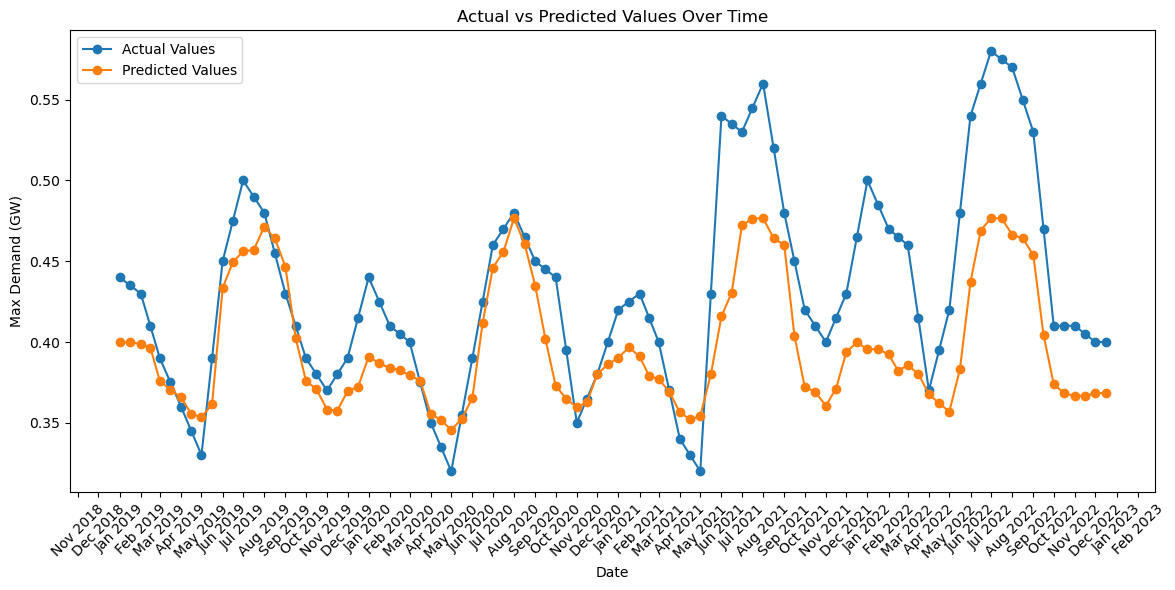

2nd CV R-squared: 0.3865 (Ideal: 1) 

2nd CV Mean Absolute Error: 0.0383 (Ideal: 0) 

2nd CV Mean Squared Error: 0.0024 (Ideal: 0) 

2nd CV Root Mean Squared Error: 0.0486 (Ideal: 0) 

2nd CV Explained Variance Score: 0.6893 (Ideal: 1)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

# Define the parameter grid
param_grid = {
    #'n_estimators': [5, 10, 30, 50, 100], #,150, 200,300,400],
    'n_estimators': [70],#[65,66,67,68,69,70,71,72,73,74,75],#[25,26,27,28,29,30,31,32,33,34,35],#[32],#[20,30,40,50,60,70], #,150, 200,300,400],
    #'max_depth': [None, 2, 5, 10, 20, 30], 
    'max_depth': [10],#[5,6,7,8,9,10,11,12,13,14,15],#16,17,18,19,20,21,22,23,24,25],#,8,9,10],#20,30,40,50],
    #'max_depth': [11],
    
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True,False], 
    #'oob_score': [True, False],
    #'warm_start': [False],
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error']#['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
    
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=15, n_jobs=-1)

#cv was 10 before


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)




#Convert index to datetime
y_test.index = pd.to_datetime(y_test.index)


plt.figure(figsize=(14, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)


# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

# Display the plot
plt.show()

# Calculate R-squared
r2c = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maec = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
msec = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmsec = np.sqrt(msec)

# Calculate Explained Variance Score
explained_variancec = explained_variance_score(y_test, y_pred_best)

# Display the results
#print(f'R-squared: {r2:.4f} (Ideal: 1)')
#print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2c:.4f} (Ideal: 1) \n')
#print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
#print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
#print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
#print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
#print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
#print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
#print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
#print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')

In [39]:
from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(best_model.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)

tmax                         0.336956
tmin                         0.211284
tavg_rolling_avg             0.185442
GDP_mln_rolling_avg          0.108377
Population_k_rolling_avg     0.092926
powerplants_c02_kt           0.042695
Imports_GWh                  0.020001
Renewables_Production_GWh    0.002320
dtype: float64
